In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [302]:
df = pd.read_csv('nba_complete_2015-2019.csv')
pd.set_option('max_columns', None)
df.head(20)

,PLAYER_NAME,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pct_of_FGA_twos,pct_of_FGA_threes,two_pt_fg_pct,three_pt_fg_pct,DRIVES,DRIVE_FGM,DRIVE_FGA,DRIVE_PASSES,CATCH_SHOOT_FGM,CATCH_SHOOT_FGA,CATCH_SHOOT_FG3M,CATCH_SHOOT_FG3A,TOUCHES,FRONT_CT_TOUCHES,TIME_OF_POSS,PULL_UP_FGM,PULL_UP_FGA,PULL_UP_FG3M,PULL_UP_FG3A,DIST_MILES,DIST_MILES_OFF,DIST_MILES_DEF
0,Quincy Acy (15-16),PF,25,SAC,59,29,876,6.5,11.7,0.556,1.0,2.7,0.388,5.5,9.0,0.606,2.7,3.7,0.735,3.6,6.7,10.3,1.5,1.6,1.3,1.5,5.6,16.8,124.0,108,14.7,0.629,0.229,0.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,1.8,0.7,2.5,0.137,-0.2,0.2,-0.1,0.4,0.771,0.229,0.606,0.388,26,7,12,9,32,79,16.0,46.0,1116,602,23.3,5,10,2.0,2.0,62.4,32.3,30.1
1,Jordan Adams (15-16),SG,21,MEM,2,0,15,6.9,20.6,0.333,0.0,3.4,0.000,6.9,17.2,0.400,10.3,17.2,0.600,0.0,6.9,6.9,10.3,10.3,0.0,6.9,6.9,24.0,84.0,90,17.3,0.427,0.167,0.833,0.0,15.9,7.6,31.9,10.3,0.0,19.6,30.5,0.0,0.0,0.0,0.015,-2.5,9.4,6.9,0.0,0.833,0.167,0.400,0.000,1,0,0,1,0,1,0.0,1.0,22,12,0.8,1,3,0.0,0.0,1.2,0.6,0.5
2,Steven Adams (15-16),C,22,OKC,80,80,2014,6.4,10.5,0.613,0.0,0.0,NaN,6.4,10.5,0.613,2.8,4.8,0.582,5.4,7.7,13.1,1.5,1.0,2.2,2.1,5.5,15.7,123.0,105,15.5,0.621,0.000,0.460,12.5,16.1,14.4,4.3,1.0,3.3,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1,1.000,0.000,0.613,NaN,14,1,7,5,4,10,NaN,NaN,3601,1421,81.9,0,2,NaN,NaN,143.0,77.2,65.8
3,Arron Afflalo (15-16),SG,30,NYK,71,57,2371,7.7,17.3,0.443,2.0,5.2,0.382,5.7,12.2,0.469,2.4,2.8,0.840,0.5,5.3,5.8,3.1,0.5,0.2,1.8,3.1,19.7,105.0,112,10.9,0.531,0.298,0.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,1.8,0.9,2.7,0.055,-1.3,-1.6,-2.9,-0.5,0.702,0.298,0.469,0.382,224,44,106,68,123,299,76.0,196.0,3744,2749,157.5,132,292,12.0,37.0,165.9,92.4,73.5
4,Alexis Ajinca (15-16),C,27,NOP,59,17,861,8.6,18.1,0.476,0.0,0.1,0.000,8.6,18.1,0.478,3.0,3.6,0.839,4.3,11.2,15.5,1.8,1.1,2.1,3.1,7.7,20.3,100.0,107,13.8,0.514,0.003,0.197,9.3,25.9,17.3,5.8,1.1,3.4,13.6,20.4,0.2,0.9,1.0,0.058,-3.4,-0.6,-4.0,-0.4,0.997,0.003,0.478,0.000,27,7,19,4,51,122,0.0,1.0,1485,773,34.7,10,21,0.0,0.0,58.3,30.4,27.9
5,Cole Aldrich (15-16),C,27,LAC,60,5,800,8.4,14.1,0.596,0.0,0.0,NaN,8.4,14.1,0.596,3.8,5.3,0.714,5.4,12.7,18.0,3.1,2.9,4.3,4.0,8.7,20.5,113.0,94,21.3,0.626,0.000,0.373,11.9,27.1,19.6,10.0,2.9,6.7,19.6,18.4,1.4,2.0,3.5,0.209,-0.9,3.4,2.4,0.9,1.000,0.000,0.596,NaN,7,1,3,3,0,0,NaN,NaN,1604,817,39.6,0,2,NaN,NaN,55.5,29.6,25.9
6,LaMarcus Aldridge (15-16),PF,30,SAS,74,74,2261,12.1,23.7,0.513,0.0,0.4,0.000,12.1,23.3,0.521,5.9,6.8,0.858,4.0,10.3,14.3,2.5,0.9,1.8,2.2,3.4,30.1,114.0,99,22.4,0.565,0.015,0.289,9.2,22.2,15.9,8.1,0.9,2.8,7.8,25.9,5.6,4.5,10.1,0.215,2.0,0.3,2.3,2.5,0.985,0.015,0.521,0.000,86,25,50,15,149,337,0.0,15.0,4126,2781,123.1,79,221,0.0,1.0,153.7,82.8,70.8
7,Cliff Alexander (15-16),PF,20,POR,8,0,36,6.9,13.9,0.500,0.0,0.0,NaN,6.9,13.9,0.500,0.0,0.0,NaN,2.8,5.6,8.3,0.0,1.4,2.8,1.4,1.4,13.9,100.0,107,11.6,0.500,0.000,0.000,6.0,12.1,9.0,0.0,1.4,4.4,9.1,13.3,0.0,0.0,0.0,0.052,-0.5,0.5,0.0,0.0,1.000,0.000,0.500,NaN,0,0,0,0,0,2,NaN,NaN,50,26,1.3,1,1,NaN,NaN,2.6,1.4,1.2
8,Lavoy Allen (15-16),PF,26,IND,79,28,1599,5.9,11.5,0.516,0.0,0.0,NaN,5.9,11.5,0.516,1.4,2.3,0.630,5.0,8.1,13.2,2.4,0.8,1.3,2.1,4.6,13.3,110.0,104,12.4,0.532,0.000,0.197,11.1,17.8,14.5,7.1,0.8,2.1,14.6,13.0,1.6,2.1,3.7,0.110,-1.7,0.1,-1.6,0.2,1.000,0.000,0.516,NaN,12,1,7,3,45,121,NaN,NaN,2603,1512,65.4,3,5,NaN,NaN,109.8,57.8,52.0
9,Tony Allen (15-16),SG,34,MEM,64,57,1620,6.8,14.9,0.458,0.5,1.3,0.357,6.4,13.6,0.468,2.9,4.4,0.652,3.3,6.1,9.4,2.2,3.5,0.6,2.5,5.6,17.0,101.0,105,12.9,0.505,0.090,0.294,7.0,14.1,10.4,6.9,3.5,1.0,12.8,16.8,0.5,1.9,2.4,0.072,-2.2,1.2,-1.0,0.4,0.910,0.090,0.468,0.357,194,34,93,56,30,84,15.0,42.0,1957,1346,79.0,13,34,0.0,0.0,112.2,58.4,53.7


In [303]:
#Dropping duplicate columns ('two_pt_fg_pct' and 'three_pt_fg_pct')
df = df.drop(columns = ['two_pt_fg_pct', 'three_pt_fg_pct'])

In [304]:
pd.set_option('display.max_rows', None)
df.isna().sum()

PLAYER_NAME            0
Pos                    0
Age                    0
Tm                     0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                    9
3P                     0
3PA                    0
3P%                  164
2P                     0
2PA                    0
2P%                   28
FT                     0
FTA                    0
FT%                   95
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
ORtg                   8
DRtg                   0
PER                    0
TS%                    9
3PAr                   9
FTr                    9
ORB%                   0
DRB%                   0
TRB%                   0
AST%                   0
STL%                   0
BLK%                   0


In [305]:
#We will likely replace all null values with 0. Looking at the columns it seems that null values were created
#by dividing by zero (i.e. 3PT%  = 3PTs made/ 3PTs attempted and a player with zero 3PT attempts will have zero 
# which can be interepreted as 0%. Mathematically it would be 0/0, which is undefined hence the null values in 
#some rows

#Null values in the distance miles column doesn't make sense as it should either be zero or some float number 
# greater than zero

#We see that there is one player who has null values as for the distance metrics. It is likely this player
#only played one game and was possibly substituted in at the end of a game so that the game could be finished.

#Nonetheless we will substitute all null values with 0 and use conditions to filter out players who did not have
#meaningful possessions.



In [306]:
df.fillna(0, inplace=True)

In [307]:
#Now we will need to do some additional math to add another player evaluation metric:
#PPP - Points per possession

#We will also do some math to transform the nba tracking statistics from season aggregates to per game stats.
#It's much more intuitive to think about how many miles a player traveled on the court in a single game
#rather than over the course of a season.
#One item of note: The box score statistics from basketball reference are per 100 possessions. Per 100 possessions
#are typically better for analysis because it eliminates discrepancies in pace and style of play 
#Teams that play at a faster pace won't have a statistical advantage over teams that play slower
#Also not all games are created equal - some games go into a single or multiple overtimes 

In [308]:
#check columns as we will use indexing to write a loop to transform aggregate statistics
df.columns

Index(['PLAYER_NAME', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'pct_of_FGA_twos', 'pct_of_FGA_threes', 'DRIVES',
       'DRIVE_FGM', 'DRIVE_FGA', 'DRIVE_PASSES', 'CATCH_SHOOT_FGM',
       'CATCH_SHOOT_FGA', 'CATCH_SHOOT_FG3M', 'CATCH_SHOOT_FG3A', 'TOUCHES',
       'FRONT_CT_TOUCHES', 'TIME_OF_POSS', 'PULL_UP_FGM', 'PULL_UP_FGA',
       'PULL_UP_FG3M', 'PULL_UP_FG3A', 'DIST_MILES', 'DIST_MILES_OFF',
       'DIST_MILES_DEF'],
      dtype='object')

In [309]:
df['MPG'] = df['MP']/df['G'] #calculate minutes per game

#calculate per game drive stats and drive field goal percentage 
df['DRIVES/GM'] = df['DRIVES']/df['G']
df['DRIVE_FGA/GM'] = df['DRIVE_FGA']/df['G']
df['DRIVE_FG%'] = df['DRIVE_FGM']/df['DRIVE_FGA']
df['DRIVE_PASSES/GM'] = df['DRIVE_PASSES']/df['G']

#calculate per game catch & shoot stats and catch & shoot percentage
df['CATCH_SHOOT%'] = df['CATCH_SHOOT_FGM']/df['CATCH_SHOOT_FGA']
df['CATCH_SHOOT_FGA/G'] = df['CATCH_SHOOT_FGA']/df['G']
df['CATCH_SHOOT_FG3%'] = df['CATCH_SHOOT_FG3M']/df['CATCH_SHOOT_FG3A']
df['CATCH_SHOOT_FG3A/GM'] = df['CATCH_SHOOT_FG3A']/df['G']

#calculate touches per game 
df['TOUCHES/GM'] = df['TOUCHES']/df['G']
df['FRONT_CT_TCH/GM'] = df['FRONT_CT_TOUCHES']/df['G']
df['TIME_OF_POSS/GM (min)'] = df['TIME_OF_POSS']/df['G']

#calculate per game pull up stats and pull up percentage
df['PULL_UP%'] = df['PULL_UP_FGM']/df['PULL_UP_FGA']
df['PULL_UP_FGA/GM'] = df['PULL_UP_FGA']/df['G']
df['PULL_UP_FG3%'] = df['PULL_UP_FG3M']/df['PULL_UP_FG3A']
df['PULL_UP_FG3A/GM'] = df['CATCH_SHOOT_FG3A']/df['G']

#calculate distance traveled per game
df['DIST_MILES/G'] = df['DIST_MILES']/df['G']
df['DIST_MILES_OFF/GM'] = df['DIST_MILES_OFF']/df['G']
df['DIST_MILES_DEF/GM'] = df['DIST_MILES_DEF']/df['G']



In [310]:
df.isna().sum()

PLAYER_NAME                0
Pos                        0
Age                        0
Tm                         0
G                          0
GS                         0
MP                         0
FG                         0
FGA                        0
FG%                        0
3P                         0
3PA                        0
3P%                        0
2P                         0
2PA                        0
2P%                        0
FT                         0
FTA                        0
FT%                        0
ORB                        0
DRB                        0
TRB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
ORtg                       0
DRtg                       0
PER                        0
TS%                        0
3PAr                       0
FTr                        0
ORB%          

In [311]:
#Check to make sure there are 435 players who had zero 3 point pull up attempts
len(df.loc[df['PULL_UP_FG3A'] == 0])

435

In [312]:
df.fillna(0, inplace=True)

In [313]:
df.isna().sum()

PLAYER_NAME              0
Pos                      0
Age                      0
Tm                       0
G                        0
GS                       0
MP                       0
FG                       0
FGA                      0
FG%                      0
3P                       0
3PA                      0
3P%                      0
2P                       0
2PA                      0
2P%                      0
FT                       0
FTA                      0
FT%                      0
ORB                      0
DRB                      0
TRB                      0
AST                      0
STL                      0
BLK                      0
TOV                      0
PF                       0
PTS                      0
ORtg                     0
DRtg                     0
PER                      0
TS%                      0
3PAr                     0
FTr                      0
ORB%                     0
DRB%                     0
TRB%                     0
A

In [314]:
df.fillna(0, inplace=True)

In [315]:
#create a year column to look at trends over time
names_list = list(df.PLAYER_NAME)
for name in names_list:
    if '15-16' in name:
        df.loc[names_list.index(name), 'Year'] = '2015-16'
    elif '16-17' in name:
        df.loc[names_list.index(name), 'Year'] = '2016-17'
    elif '17-18' in name:
        df.loc[names_list.index(name), 'Year'] = '2017-18'
    elif '18-19' in name:
        df.loc[names_list.index(name), 'Year'] = '2018-19'

In [316]:
df.head()

,PLAYER_NAME,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pct_of_FGA_twos,pct_of_FGA_threes,DRIVES,DRIVE_FGM,DRIVE_FGA,DRIVE_PASSES,CATCH_SHOOT_FGM,CATCH_SHOOT_FGA,CATCH_SHOOT_FG3M,CATCH_SHOOT_FG3A,TOUCHES,FRONT_CT_TOUCHES,TIME_OF_POSS,PULL_UP_FGM,PULL_UP_FGA,PULL_UP_FG3M,PULL_UP_FG3A,DIST_MILES,DIST_MILES_OFF,DIST_MILES_DEF,MPG,DRIVES/GM,DRIVE_FGA/GM,DRIVE_FG%,DRIVE_PASSES/GM,CATCH_SHOOT%,CATCH_SHOOT_FGA/G,CATCH_SHOOT_FG3%,CATCH_SHOOT_FG3A/GM,TOUCHES/GM,FRONT_CT_TCH/GM,TIME_OF_POSS/GM (min),PULL_UP%,PULL_UP_FGA/GM,PULL_UP_FG3%,PULL_UP_FG3A/GM,DIST_MILES/G,DIST_MILES_OFF/GM,DIST_MILES_DEF/GM,Year
0,Quincy Acy (15-16),PF,25,SAC,59,29,876,6.5,11.7,0.556,1.0,2.7,0.388,5.5,9.0,0.606,2.7,3.7,0.735,3.6,6.7,10.3,1.5,1.6,1.3,1.5,5.6,16.8,124.0,108,14.7,0.629,0.229,0.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,1.8,0.7,2.5,0.137,-0.2,0.2,-0.1,0.4,0.771,0.229,26,7,12,9,32,79,16.0,46.0,1116,602,23.3,5,10,2.0,2.0,62.4,32.3,30.1,14.847458,0.440678,0.203390,0.583333,0.152542,0.405063,1.338983,0.347826,0.779661,18.915254,10.203390,0.394915,0.500000,0.169492,1.000000,0.779661,1.057627,0.547458,0.510169,2015-16
1,Jordan Adams (15-16),SG,21,MEM,2,0,15,6.9,20.6,0.333,0.0,3.4,0.000,6.9,17.2,0.400,10.3,17.2,0.600,0.0,6.9,6.9,10.3,10.3,0.0,6.9,6.9,24.0,84.0,90,17.3,0.427,0.167,0.833,0.0,15.9,7.6,31.9,10.3,0.0,19.6,30.5,0.0,0.0,0.0,0.015,-2.5,9.4,6.9,0.0,0.833,0.167,1,0,0,1,0,1,0.0,1.0,22,12,0.8,1,3,0.0,0.0,1.2,0.6,0.5,7.500000,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,11.000000,6.000000,0.400000,0.333333,1.500000,0.000000,0.500000,0.600000,0.300000,0.250000,2015-16
2,Steven Adams (15-16),C,22,OKC,80,80,2014,6.4,10.5,0.613,0.0,0.0,0.000,6.4,10.5,0.613,2.8,4.8,0.582,5.4,7.7,13.1,1.5,1.0,2.2,2.1,5.5,15.7,123.0,105,15.5,0.621,0.000,0.460,12.5,16.1,14.4,4.3,1.0,3.3,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1,1.000,0.000,14,1,7,5,4,10,0.0,0.0,3601,1421,81.9,0,2,0.0,0.0,143.0,77.2,65.8,25.175000,0.175000,0.087500,0.142857,0.062500,0.400000,0.125000,0.000000,0.000000,45.012500,17.762500,1.023750,0.000000,0.025000,0.000000,0.000000,1.787500,0.965000,0.822500,2015-16
3,Arron Afflalo (15-16),SG,30,NYK,71,57,2371,7.7,17.3,0.443,2.0,5.2,0.382,5.7,12.2,0.469,2.4,2.8,0.840,0.5,5.3,5.8,3.1,0.5,0.2,1.8,3.1,19.7,105.0,112,10.9,0.531,0.298,0.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,1.8,0.9,2.7,0.055,-1.3,-1.6,-2.9,-0.5,0.702,0.298,224,44,106,68,123,299,76.0,196.0,3744,2749,157.5,132,292,12.0,37.0,165.9,92.4,73.5,33.394366,3.154930,1.492958,0.415094,0.957746,0.411371,4.211268,0.387755,2.760563,52.732394,38.718310,2.218310,0.452055,4.112676,0.324324,2.760563,2.336620,1.301408,1.035211,2015-16
4,Alexis Ajinca (15-16),C,27,NOP,59,17,861,8.6,18.1,0.476,0.0,0.1,0.000,8.6,18.1,0.478,3.0,3.6,0.839,4.3,11.2,15.5,1.8,1.1,2.1,3.1,7.7,20.3,100.0,107,13.8,0.514,0.003,0.197,9.3,25.9,17.3,5.8,1.1,3.4,13.6,20.4,0.2,0.9,1.0,0.058,-3.4,-0.6,-4.0,-0.4,0.997,0.003,27,7,19,4,51,122,0.0,1.0,1485,773,34.7,10,21,0.0,0.0,58.3,30.4,27.9,14.593220,0.457627,0.322034,0.368421,0.067797,0.418033,2.067797,0.000000,0.016949,25.169492,13.101695,0.588136,0.476190,0.355932,0.000000,0.016949,0.988136,0.515254,0.472881,2015-16


In [317]:
df.Pos.value_counts()

SG       462
PF       416
PG       409
C        387
SF       344
SF-SG      4
PF-C       3
PF-SF      2
SG-SF      2
C-PF       1
PG-SG      1
SG-PF      1
Name: Pos, dtype: int64

In [318]:
#There are a few players where Basketball reference lists multiple positions for that player.
#We will use the first position listed as their primary position.

In [319]:
df['Pos'] = df['Pos'].map(lambda x: x.split('-')[0])

In [320]:
df.Pos.value_counts()

SG    465
PF    421
PG    410
C     388
SF    348
Name: Pos, dtype: int64

In [321]:
#look at players who averaged at least 5 mpg and played in more than 10 games
len(df.loc[(df['MPG'] >= 5) & (df['G'] > 10)])

1772

In [322]:
df_cutoff = df.loc[(df['MPG'] >= 5) & (df['G'] > 10)]

In [323]:
#3PA and 3P% by year 
df_cutoff.groupby(['Year', 'Pos']).mean().reset_index().pivot('Year','Pos', '3PA')

Pos,C,PF,PG,SF,SG
Year,,,,,
2015-16,0.773563,3.643820,5.668235,6.414634,6.935227
2016-17,1.562791,4.602151,6.104651,6.303797,7.433333
2017-18,1.965591,5.649398,6.086458,6.346667,7.573333
2018-19,2.205952,6.230000,6.606522,6.594521,8.070796


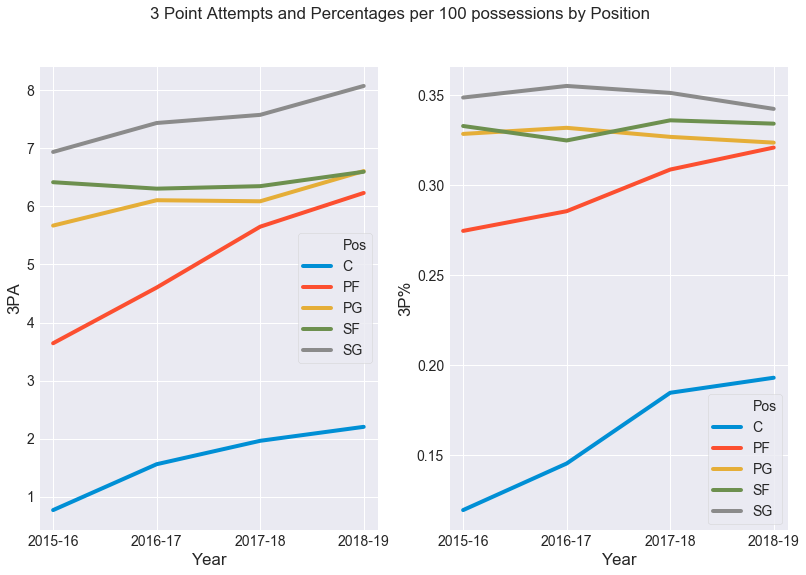

In [324]:
style.use('fivethirtyeight')
sns.set_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8));
#ax1.set_title('3 Point Attempts per 100 Poss by Position')
#ax2.set_title('3 Point Percentage by Position')
fig.suptitle("3 Point Attempts and Percentages per 100 possessions by Position");
sns.lineplot(data = df_cutoff.groupby(['Year', 'Pos']).mean().reset_index(),
             x='Year', 
             y='3PA',
             hue='Pos', 
             ax = ax1);
sns.lineplot(data = df_cutoff.groupby(['Year', 'Pos']).mean().reset_index(),
             x = 'Year',
             y = '3P%',
             hue = 'Pos',
             ax= ax2);

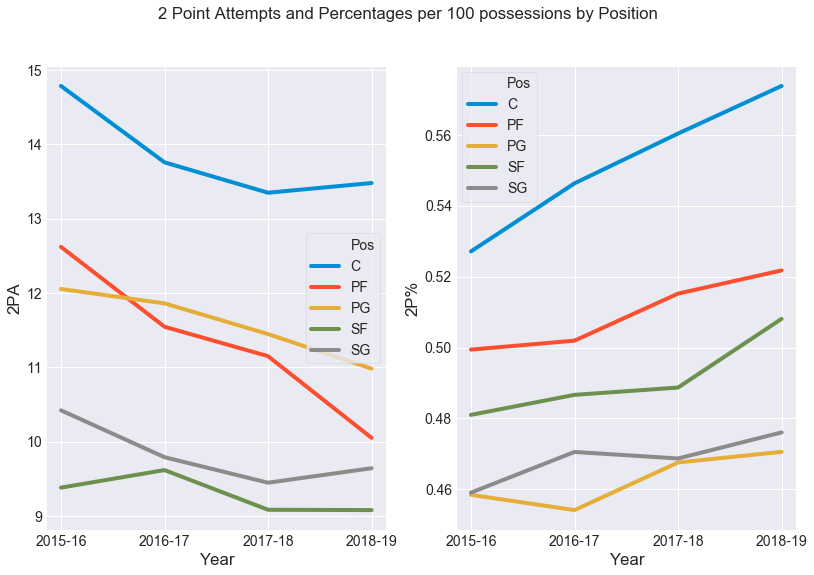

In [325]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8));
#ax1.set_title('2 Point Attempts by Position');
#ax2.set_title('2 Point Percentage by Position');
fig.suptitle("2 Point Attempts and Percentages per 100 possessions by Position");
sns.lineplot(data = df_cutoff.groupby(['Year', 'Pos']).mean().reset_index(),
             x='Year', 
             y='2PA',
             hue='Pos', 
             ax = ax1);
sns.lineplot(data = df_cutoff.groupby(['Year', 'Pos']).mean().reset_index(),
             x = 'Year',
             y = '2P%',
             hue = 'Pos',
             ax= ax2);

Text(0.5, 1.0, '2018-2019')

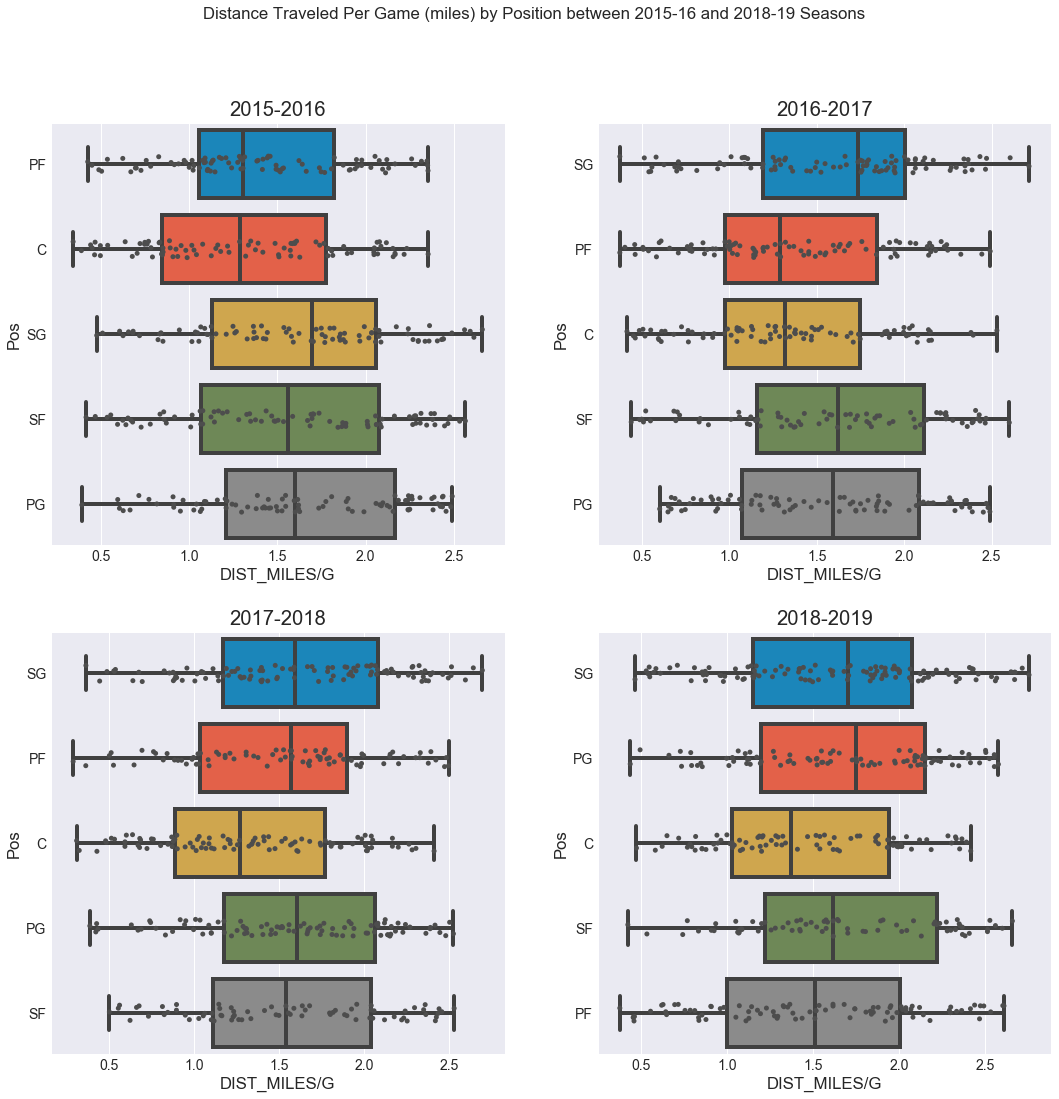

In [326]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16));
fig.suptitle('Distance Traveled Per Game (miles) by Position between 2015-16 and 2018-19 Seasons')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], ax=axs[0][0])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], 
              color='.3', ax=axs[0][0])
axs[0][0].set_title('2015-2016')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], ax=axs[0][1])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], 
              color='.3', ax=axs[0][1])
axs[0][1].set_title('2016-2017')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], ax=axs[1][0])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], 
              color='.3', ax=axs[1][0])
axs[1][0].set_title('2017-2018')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], ax=axs[1][1])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], 
              color='.3', ax=axs[1][1])
axs[1][1].set_title('2018-2019')


Text(0.5, 1.0, '2018-2019')

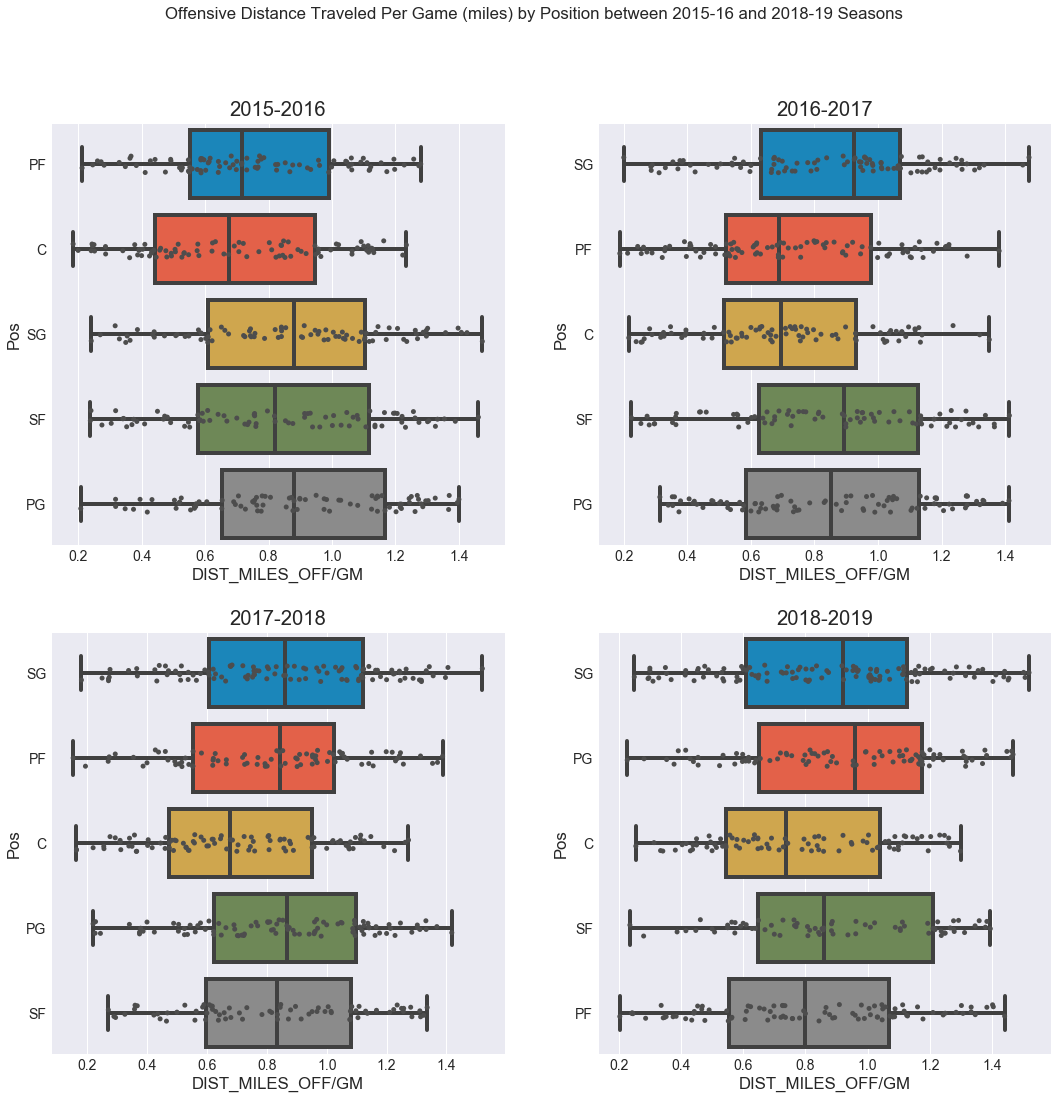

In [327]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16));
fig.suptitle('Offensive Distance Traveled Per Game (miles) by Position between 2015-16 and 2018-19 Seasons')

sns.boxplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], ax=axs[0][0])
sns.stripplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], 
              color='.3', ax=axs[0][0])
axs[0][0].set_title('2015-2016')

sns.boxplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], ax=axs[0][1])
sns.stripplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], 
              color='.3', ax=axs[0][1])
axs[0][1].set_title('2016-2017')

sns.boxplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], ax=axs[1][0])
sns.stripplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], 
              color='.3', ax=axs[1][0])
axs[1][0].set_title('2017-2018')

sns.boxplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], ax=axs[1][1])
sns.stripplot(x='DIST_MILES_OFF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], 
              color='.3', ax=axs[1][1])
axs[1][1].set_title('2018-2019')

Text(0.5, 1.0, '2018-2019')

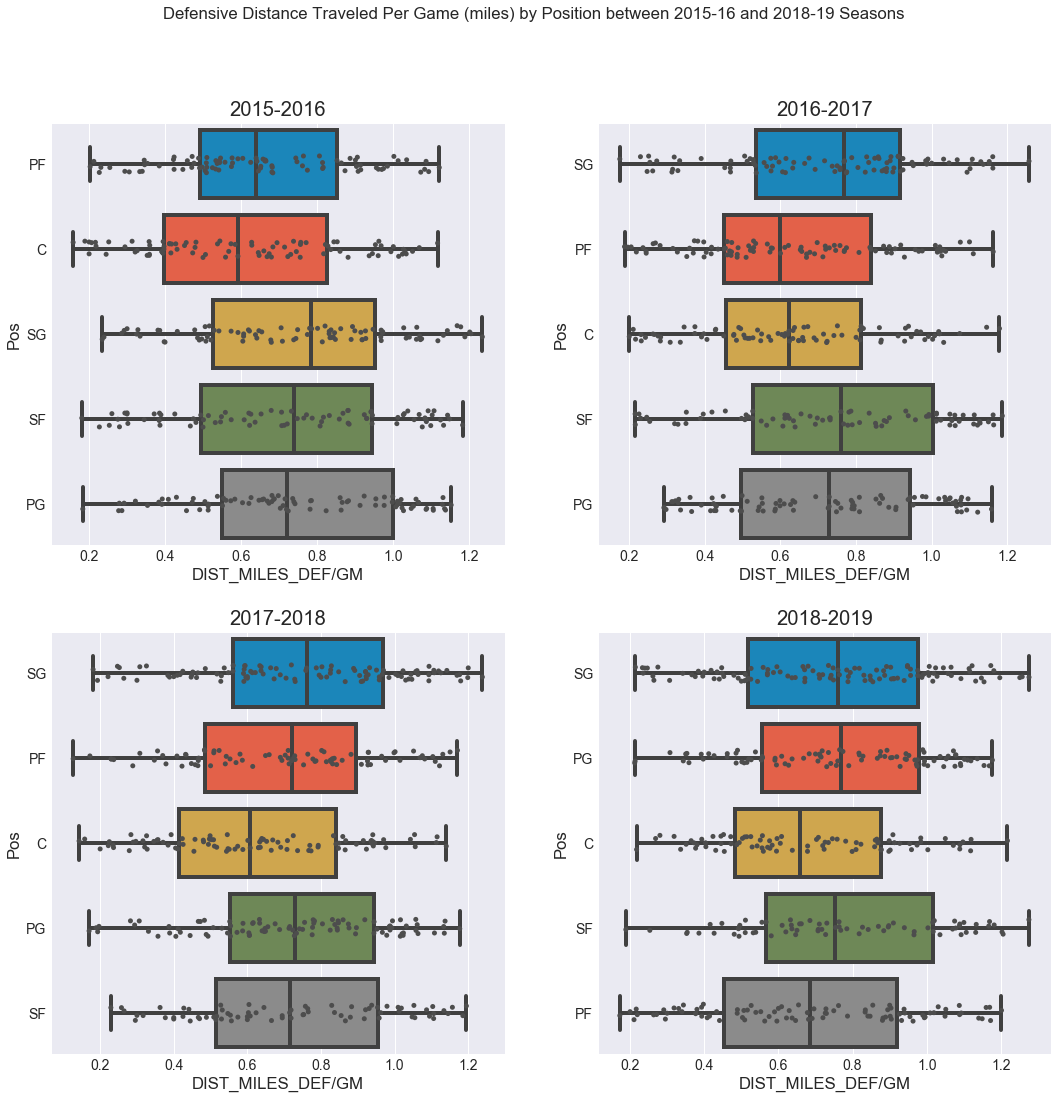

In [328]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16));
fig.suptitle('Defensive Distance Traveled Per Game (miles) by Position between 2015-16 and 2018-19 Seasons')

sns.boxplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], ax=axs[0][0])
sns.stripplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], 
              color='.3', ax=axs[0][0])
axs[0][0].set_title('2015-2016')

sns.boxplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], ax=axs[0][1])
sns.stripplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], 
              color='.3', ax=axs[0][1])
axs[0][1].set_title('2016-2017')

sns.boxplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], ax=axs[1][0])
sns.stripplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], 
              color='.3', ax=axs[1][0])
axs[1][0].set_title('2017-2018')

sns.boxplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], ax=axs[1][1])
sns.stripplot(x='DIST_MILES_DEF/GM', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], 
              color='.3', ax=axs[1][1])
axs[1][1].set_title('2018-2019')

In [ ]:
#touches, time of possession, front court touches
############################
fig, axs = plt.subplots(2, 2, figsize=(16, 16));
fig.suptitle('Distance Traveled Per Game (miles) by Position between 2015-16 and 2018-19 Seasons')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], ax=axs[0][0])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], 
              color='.3', ax=axs[0][0])
axs[0][0].set_title('2015-2016')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], ax=axs[0][1])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], 
              color='.3', ax=axs[0][1])
axs[0][1].set_title('2016-2017')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], ax=axs[1][0])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], 
              color='.3', ax=axs[1][0])
axs[1][0].set_title('2017-2018')

sns.boxplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], ax=axs[1][1])
sns.stripplot(x='DIST_MILES/G', y='Pos', data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], 
              color='.3', ax=axs[1][1])
axs[1][1].set_title('2018-2019')

Text(0.5, 1.0, '2018-19')

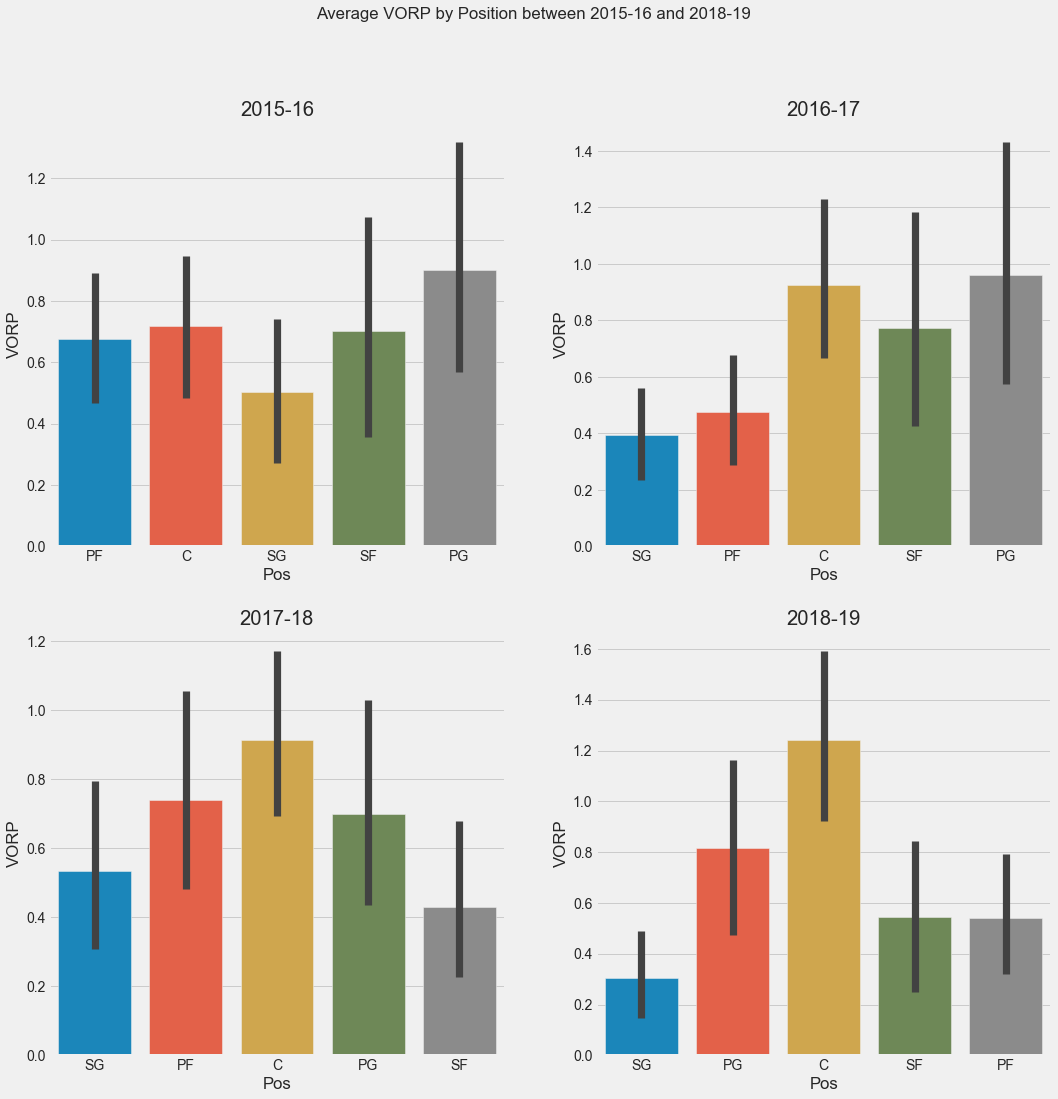

In [329]:
style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize=(16, 16));
fig.suptitle('Average VORP by Position between 2015-16 and 2018-19')
sns.barplot(x='Pos', y='VORP', 
            data=df_cutoff.loc[df_cutoff['Year'] == '2015-16'], ax=axs[0][0])
axs[0][0].set_title('2015-16')
sns.barplot(x='Pos', y='VORP', 
            data=df_cutoff.loc[df_cutoff['Year'] == '2016-17'], ax=axs[0][1])
axs[0][1].set_title('2016-17')
sns.barplot(x='Pos', y='VORP', 
            data=df_cutoff.loc[df_cutoff['Year'] == '2017-18'], ax=axs[1][0])
axs[1][0].set_title('2017-18')
sns.barplot(x='Pos', y='VORP', 
            data=df_cutoff.loc[df_cutoff['Year'] == '2018-19'], ax=axs[1][1])
axs[1][1].set_title('2018-19')

In [216]:
### Look at top 5 VORPs per year for these seasons

In [330]:
df_cutoff.columns

Index(['PLAYER_NAME', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'pct_of_FGA_twos', 'pct_of_FGA_threes', 'DRIVES',
       'DRIVE_FGM', 'DRIVE_FGA', 'DRIVE_PASSES', 'CATCH_SHOOT_FGM',
       'CATCH_SHOOT_FGA', 'CATCH_SHOOT_FG3M', 'CATCH_SHOOT_FG3A', 'TOUCHES',
       'FRONT_CT_TOUCHES', 'TIME_OF_POSS', 'PULL_UP_FGM', 'PULL_UP_FGA',
       'PULL_UP_FG3M', 'PULL_UP_FG3A', 'DIST_MILES', 'DIST_MILES_OFF',
       'DIST_MILES_DEF', 'MPG', 'DRIVES/GM', 'DRIVE_FGA/GM', 'DRIVE_FG%',
       'DRIVE_PASSES/GM', 'CATCH_SHOOT%', 'CATCH_SHOOT_FGA/G',
       'CATCH_SHOOT_FG3%', 'CATCH_SHOOT_FG3A/GM', 'TOUCHES/GM',
       'FRONT_CT_TCH/GM', 'TIME_OF_POSS/GM (min)', 'PUL

In [366]:
df_modeling = df_cutoff.drop(columns=[
       'PLAYER_NAME','Age', 'Tm', 'G', 'GS','MP','DRIVES', '2P', '3P', 'FT', 'TRB',
       'DRIVE_FGM', 'DRIVE_FGA', 'DRIVE_PASSES', 'CATCH_SHOOT_FGM',
       'CATCH_SHOOT_FGA', 'CATCH_SHOOT_FG3M', 'CATCH_SHOOT_FG3A', 'TOUCHES',
       'FRONT_CT_TOUCHES', 'TIME_OF_POSS', 'PULL_UP_FGM', 'PULL_UP_FGA',
       'PULL_UP_FG3M', 'PULL_UP_FG3A', 'DIST_MILES', 'DIST_MILES_OFF',
       'DIST_MILES_DEF', 'MPG', 'Year'])

In [367]:
#vanilla logistic regression model

X = df_modeling.drop(columns=['Pos'])
y = df_modeling['Pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=123)

log_vanilla = LogisticRegression(solver='newton-cg', max_iter=1000)
log_vanilla.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [368]:
prediction = log_vanilla.predict(X_test)

In [369]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction))

----------------------------------------
Accuracy Score:
0.6992481203007519
----------------------------------------
Confusion Matrix:
[[81 22  0  1  0]
 [17 69  0 21  1]
 [ 0  1 91  1 13]
 [ 2  8  1 51 25]
 [ 0  2 11 34 80]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           C       0.81      0.78      0.79       104
          PF       0.68      0.64      0.66       108
          PG       0.88      0.86      0.87       106
          SF       0.47      0.59      0.52        87
          SG       0.67      0.63      0.65       127

    accuracy                           0.70       532
   macro avg       0.70      0.70      0.70       532
weighted avg       0.71      0.70      0.70       532



In [370]:
C_values = [0.01, 0.1, 1, 10, 100]
scores = []
for c in C_values:
    log_vanilla = LogisticRegression(solver='newton-cg', max_iter=1000, C=c)
    log_vanilla.fit(X_train, y_train)
    prediction = log_vanilla.predict(X_test)
    score = accuracy_score(y_test, prediction)
    scores.append(score)
    

In [371]:
scores

[0.7274436090225563,
 0.7255639097744361,
 0.6992481203007519,
 0.6973684210526315,
 0.6917293233082706]

In [372]:
log_vanilla2 = LogisticRegression(solver='newton-cg', max_iter=1000, C=0.01)
log_vanilla2.fit(X_train, y_train)
prediction_train = log_vanilla2.predict(X_train)
prediction_test = log_vanilla2.predict(X_test)

print('-'*40)
print('Training Accuracy Score:')
print(accuracy_score(y_train, prediction_train))

print('-'*40)
print('Testing Accuracy Score:')
print(accuracy_score(y_test, prediction_test))

print('-'*40)
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, prediction_test))

print('-'*40)
print('Test Classification Matrix:')
print(classification_report(y_test, prediction_test))



----------------------------------------
Training Accuracy Score:
0.7637096774193548
----------------------------------------
Testing Accuracy Score:
0.7274436090225563
----------------------------------------
Test Confusion Matrix:
[[87 15  0  2  0]
 [16 70  0 17  5]
 [ 0  1 94  1 10]
 [ 2  8  2 52 23]
 [ 0  0 10 33 84]]
----------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           C       0.83      0.84      0.83       104
          PF       0.74      0.65      0.69       108
          PG       0.89      0.89      0.89       106
          SF       0.50      0.60      0.54        87
          SG       0.69      0.66      0.67       127

    accuracy                           0.73       532
   macro avg       0.73      0.73      0.73       532
weighted avg       0.74      0.73      0.73       532



In [373]:
###roc curve for multiclass problem

In [374]:
#Support Vector Machine - RBF
svc_vanilla = SVC(kernel='rbf')

svc_vanilla.fit(X_train, y_train)
svc_prediction_train = svc_vanilla.predict(X_train)
svc_prediction_test = svc_vanilla.predict(X_test)

print('-'*40)
print('Training Accuracy Score:')
print(accuracy_score(y_train, svc_prediction_train))

print('-'*40)
print('Testing Accuracy Score:')
print(accuracy_score(y_test, svc_prediction_test))

print('-'*40)
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, svc_prediction_test))

print('-'*40)
print('Test Classification Matrix:')
print(classification_report(y_test, svc_prediction_test))

----------------------------------------
Training Accuracy Score:
0.6524193548387097
----------------------------------------
Testing Accuracy Score:
0.6560150375939849
----------------------------------------
Test Confusion Matrix:
[[ 85  13   0   3   3]
 [ 23  57   3  12  13]
 [  0   0  90   0  16]
 [  5  12   2  14  54]
 [  0   4  12   8 103]]
----------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           C       0.75      0.82      0.78       104
          PF       0.66      0.53      0.59       108
          PG       0.84      0.85      0.85       106
          SF       0.38      0.16      0.23        87
          SG       0.54      0.81      0.65       127

    accuracy                           0.66       532
   macro avg       0.64      0.63      0.62       532
weighted avg       0.64      0.66      0.63       532



In [376]:
#Support Vector Machine - Polynomial Kernel
degrees = list(range(1, 15))
for d in degrees:
    svc_poly_vanilla = SVC(kernel='poly', degree=d)

    svc_poly_vanilla.fit(X_train, y_train)
    svc_prediction_train = svc_poly_vanilla.predict(X_train)
    svc_prediction_test = svc_poly_vanilla.predict(X_test)
    
    print('-'*40)
    print(f'Degree: {d}')
    
    print('Training Accuracy Score:')
    print(accuracy_score(y_train, svc_prediction_train))

    print('Testing Accuracy Score:')
    print(accuracy_score(y_test, svc_prediction_test))
    print('-'*40)


----------------------------------------
Degree: 1
Training Accuracy Score:
0.6137096774193549
Testing Accuracy Score:
0.6278195488721805
----------------------------------------
----------------------------------------
Degree: 2
Training Accuracy Score:
0.6653225806451613
Testing Accuracy Score:
0.6672932330827067
----------------------------------------
----------------------------------------
Degree: 3
Training Accuracy Score:
0.6967741935483871
Testing Accuracy Score:
0.6842105263157895
----------------------------------------
----------------------------------------
Degree: 4
Training Accuracy Score:
0.7056451612903226
Testing Accuracy Score:
0.6842105263157895
----------------------------------------
----------------------------------------
Degree: 5
Training Accuracy Score:
0.714516129032258
Testing Accuracy Score:
0.6917293233082706
----------------------------------------
----------------------------------------
Degree: 6
Training Accuracy Score:
0.7225806451612903
Testing Acc

In [377]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [379]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=123)
rfc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))


Accuracy on training set: 0.784
Accuracy on test set: 0.694


In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('FG', 57868.3847627219),
 ('FGA', 128493.00579191459),
 ('FG%', 6796.211323921532),
 ('3P', 4462.175809140232),
 ('3PA', 17683.389083073962),
 ('3P%', 75.12812487077798),
 ('2P', 19592.194715497233),
 ('2PA', 62371.07629579328),
 ('2P%', 347.483048069625),
 ('FT', 2717.3252023835817),
 ('FTA', 621.0416604503652),
 ('FT%', 120.23837101237744),
 ('ORB', 3674.3266410670067),
 ('DRB', 24376.31894594608),
 ('TRB', 40167.98713039245),
 ('AST', 702.818056443102),
 ('STL', 86802.8604754436),
 ('BLK', 418.8793321322722),
 ('TOV', 396.7303550563934),
 ('PF', 62.44804329213228),
 ('PTS', 92449.56005513926),
 ('ORtg', 7718.575281124399),
 ('DRtg', 17561.102782185855),
 ('PER', 4491.952407406593),
 ('TS%', 12579.457319559204),
 ('3PAr', 2499344.752937812),
 ('FTr', 94.94529445116416),
 ('ORB%', 4417.7597405423585),
 ('DRB%', 7690.422178590322),
 ('TRB%', 24254.501081800237),
 ('AST%', 572.4970763116876),
 ('STL%', 87031.97258065864),
 ('BLK%', 371.8981031694484),
 ('TOV%', 216.83431773353408),
 (

In [363]:
X_corr = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
X_corr['pairs'] = list(zip(X_corr.level_0, X_corr.level_1))

# set index to pairs
X_corr.set_index(['pairs'], inplace = True)

#drop level columns
X_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
X_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
X_corr.drop_duplicates(inplace=True)

In [364]:
X_corr[(X_corr.cc > 0.75) & (X_corr.cc < 1)]

,cc
pairs,
"(pct_of_FGA_twos, pct_of_FGA_threes)",1.000000
"(pct_of_FGA_threes, 3PAr)",0.999999
"(pct_of_FGA_twos, 3PAr)",0.999999
"(STL%, STL)",0.999956
"(TRB%, TRB)",0.998905
"(ORB, ORB%)",0.998357
"(DRB, DRB%)",0.996980
"(DIST_MILES/G, DIST_MILES_OFF/GM)",0.996747
"(BLK, BLK%)",0.995723


In [291]:
df_modeling['Pos'].value_counts()

SG    399
PG    359
PF    355
C     350
SF    309
Name: Pos, dtype: int64

In [295]:
unique, counts = np.unique(y_test, return_counts=True)

In [296]:
dict(zip(unique, counts))

{'C': 104, 'PF': 108, 'PG': 106, 'SF': 87, 'SG': 127}

In [14]:
dummy = pd.DataFrame({'a':[1,2,3,4],'b':[2,4,6,8]})
dummy['x']=dummy.a + dummy.b
dummy['y']=dummy.a - dummy.b
dummy

,a,b,x,y
0,1,2,3,-1
1,2,4,6,-2
2,3,6,9,-3
3,4,8,12,-4


In [15]:
dummy = dummy[['x', 'y', 'a', 'b']]

In [16]:
dummy

,x,y,a,b
0,3,-1,1,2
1,6,-2,2,4
2,9,-3,3,6
3,12,-4,4,8


In [297]:
df['PPP'].describe()

count    2032.000000
mean        0.921207
std         0.203096
min         0.000000
25%         0.856581
50%         0.945902
75%         1.017453
max         3.001996
Name: PPP, dtype: float64